In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result_df = joblib.load("result_df")

In [3]:
result_df[result_df["Evaluation Metric"] == "NAB"]

,Anomaly Detection Method,Characteristic,Evaluation Metric,Metric Score,Metric Score Upper,Metric Score Lower
3,anomalous,seasonality,NAB,97.201000,99.947808,94.454192
7,anomalous,trend,NAB,98.674000,100.291998,97.056002
11,anomalous,conceptdrift,NAB,97.292000,99.740084,94.843916
15,anomalous,missing,NAB,98.465000,99.537936,97.392064
19,fb,seasonality,NAB,88.353000,97.399226,79.306774
23,fb,trend,NAB,88.877000,104.055035,73.698965
27,fb,conceptdrift,NAB,94.809000,101.409264,88.208736
31,fb,missing,NAB,94.732000,100.526517,88.937483
35,glim,seasonality,NAB,90.225000,103.308343,77.141657
39,glim,trend,NAB,94.340000,102.854038,85.825962


## Seasonality

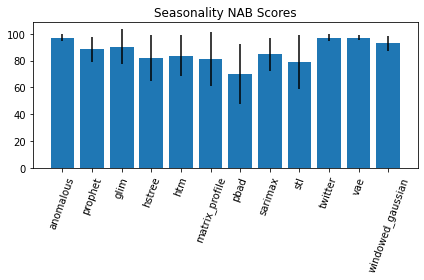

In [4]:
seasonality = result_df[(result_df["Evaluation Metric"] == "NAB") & (result_df["Characteristic"]=="seasonality")]
ci = []
for x,y in zip(seasonality["Metric Score Upper"].values, seasonality["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [seasonality["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in seasonality["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)

plt.figure()
plt.bar(range(seasonality.shape[0]), seasonality["Metric Score"].values,yerr=y_r)
plt.xticks(range(seasonality.shape[0]), the_labels)
plt.xticks(rotation=70)
# plt.ylim(-10,110)
plt.title("Seasonality NAB Scores")
plt.tight_layout()
plt.savefig("seasonality_nab.eps",format="eps")
# plt.show()

In [5]:
seasonality["Rank"] = seasonality["Metric Score"].rank(ascending=False) 
seasonality[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
3,anomalous,1.0
19,fb,6.0
35,glim,5.0
51,hstree,9.0
67,htm,8.0
83,matrix_profile,10.0
99,pbad,12.0
115,sarimax,7.0
131,stl,11.0
147,twitter,2.0


## Trend

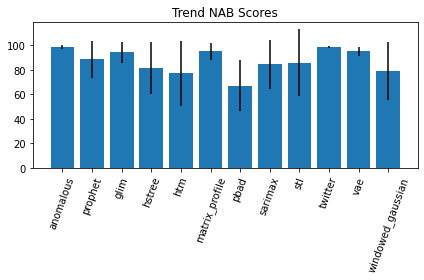

In [6]:
trend = result_df[(result_df["Evaluation Metric"] == "NAB") & (result_df["Characteristic"]=="trend")]
ci = []
for x,y in zip(trend["Metric Score Upper"].values, trend["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [trend["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in trend["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(trend.shape[0]), trend["Metric Score"].values,yerr=y_r)
plt.xticks(range(trend.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Trend NAB Scores")
plt.tight_layout()
plt.savefig("trend_nab.eps",format="eps")
# plt.show()

In [7]:
trend["Rank"] = trend["Metric Score"].rank(ascending=False) 
trend[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
7,anomalous,1.0
23,fb,6.0
39,glim,5.0
55,hstree,9.0
71,htm,11.0
87,matrix_profile,4.0
103,pbad,12.0
119,sarimax,8.0
135,stl,7.0
151,twitter,2.0


## Concept Drift

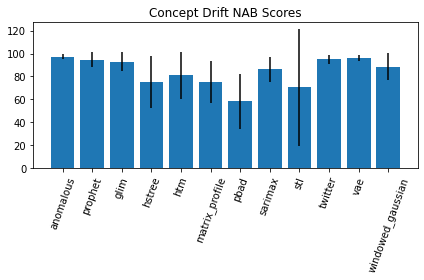

In [8]:
conceptdrift = result_df[(result_df["Evaluation Metric"] == "NAB") & (result_df["Characteristic"]=="conceptdrift")]
ci = []
for x,y in zip(conceptdrift["Metric Score Upper"].values, conceptdrift["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [conceptdrift["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in conceptdrift["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)

plt.figure()
plt.bar(range(conceptdrift.shape[0]), conceptdrift["Metric Score"].values,yerr=y_r)
plt.xticks(range(conceptdrift.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Concept Drift NAB Scores")
plt.tight_layout()
plt.savefig("cd_nab.eps",format="eps")
# plt.show()

In [9]:
conceptdrift["Rank"] = conceptdrift["Metric Score"].rank(ascending=False) 
conceptdrift[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
11,anomalous,1.0
27,fb,4.0
43,glim,5.0
59,hstree,10.0
75,htm,8.0
91,matrix_profile,9.0
107,pbad,12.0
123,sarimax,7.0
139,stl,11.0
155,twitter,3.0


## Missing

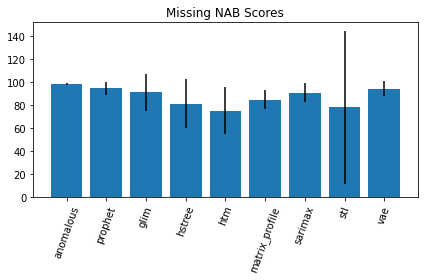

In [10]:
missing = result_df[(result_df["Evaluation Metric"] == "NAB") & (result_df["Characteristic"]=="missing")]

# remove rows with windowed_gaussian, twitter, pbad
a = ["windowed_gaussian", "twitter", "pbad"]
missing_new = missing[~missing["Anomaly Detection Method"].isin(a)]

ci = []
for x,y in zip(missing_new["Metric Score Upper"].values, missing_new["Metric Score Lower"].values):
    ci.append((y,x))
# get the range of the confidence interval
y_r = [missing_new["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in missing_new["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(missing_new.shape[0]), missing_new["Metric Score"].values,yerr=y_r)
plt.xticks(range(missing_new.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Missing NAB Scores")
plt.tight_layout()
plt.savefig("missing_nab.eps",format="eps")
# plt.show()

In [11]:
missing_new["Rank"] = missing_new["Metric Score"].rank(ascending=False) 
missing_new[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
15,anomalous,1.0
31,fb,2.0
47,glim,4.0
63,hstree,7.0
79,htm,9.0
95,matrix_profile,6.0
127,sarimax,5.0
143,stl,8.0
175,vae,3.0
